# Maps with Cartopy

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import warnings

# Make inline plots vector graphics instead of raster graphics
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', 'png')

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # sets seaborn default "prettyness:

import cartopy
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

import random 
random.seed(2)

## Plot points on a map

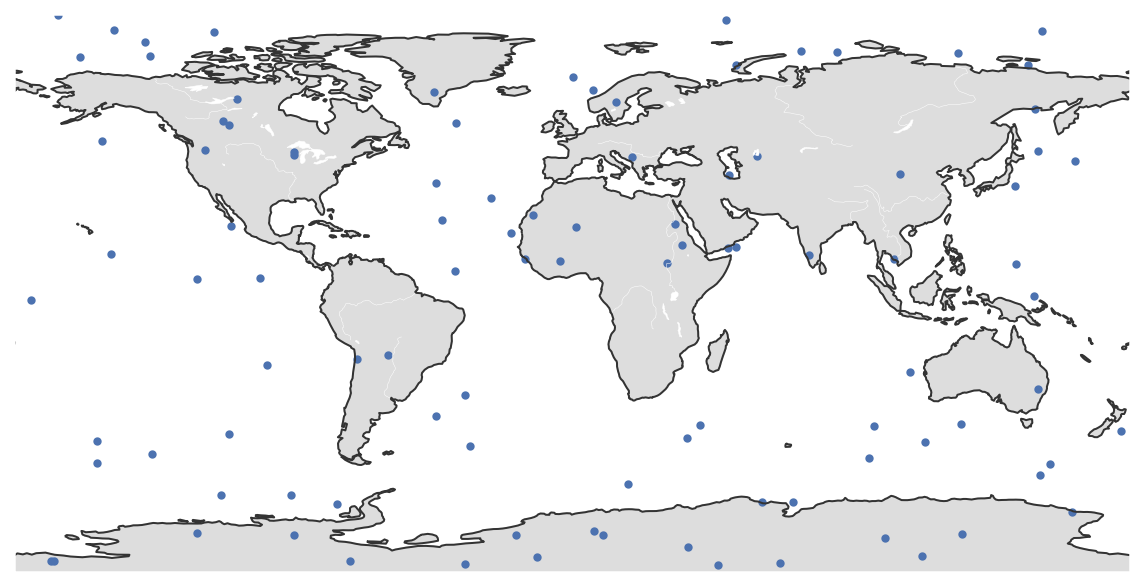

In [2]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_facecolor('white')

ax.add_feature(cartopy.feature.LAND, facecolor='#DDDDDD')
ax.add_feature(cartopy.feature.RIVERS, edgecolor='white', linewidth=.25)
ax.add_feature(cartopy.feature.LAKES, facecolor='white', linewidth=.25)

np.random.seed(1)
lon = 360 * np.random.rand(100)
lat = 180 * np.random.rand(100) - 90

ax.scatter(lon, lat, s=10, transform=ccrs.PlateCarree())

ax.coastlines(color='#333333') ;

## Works for different projections

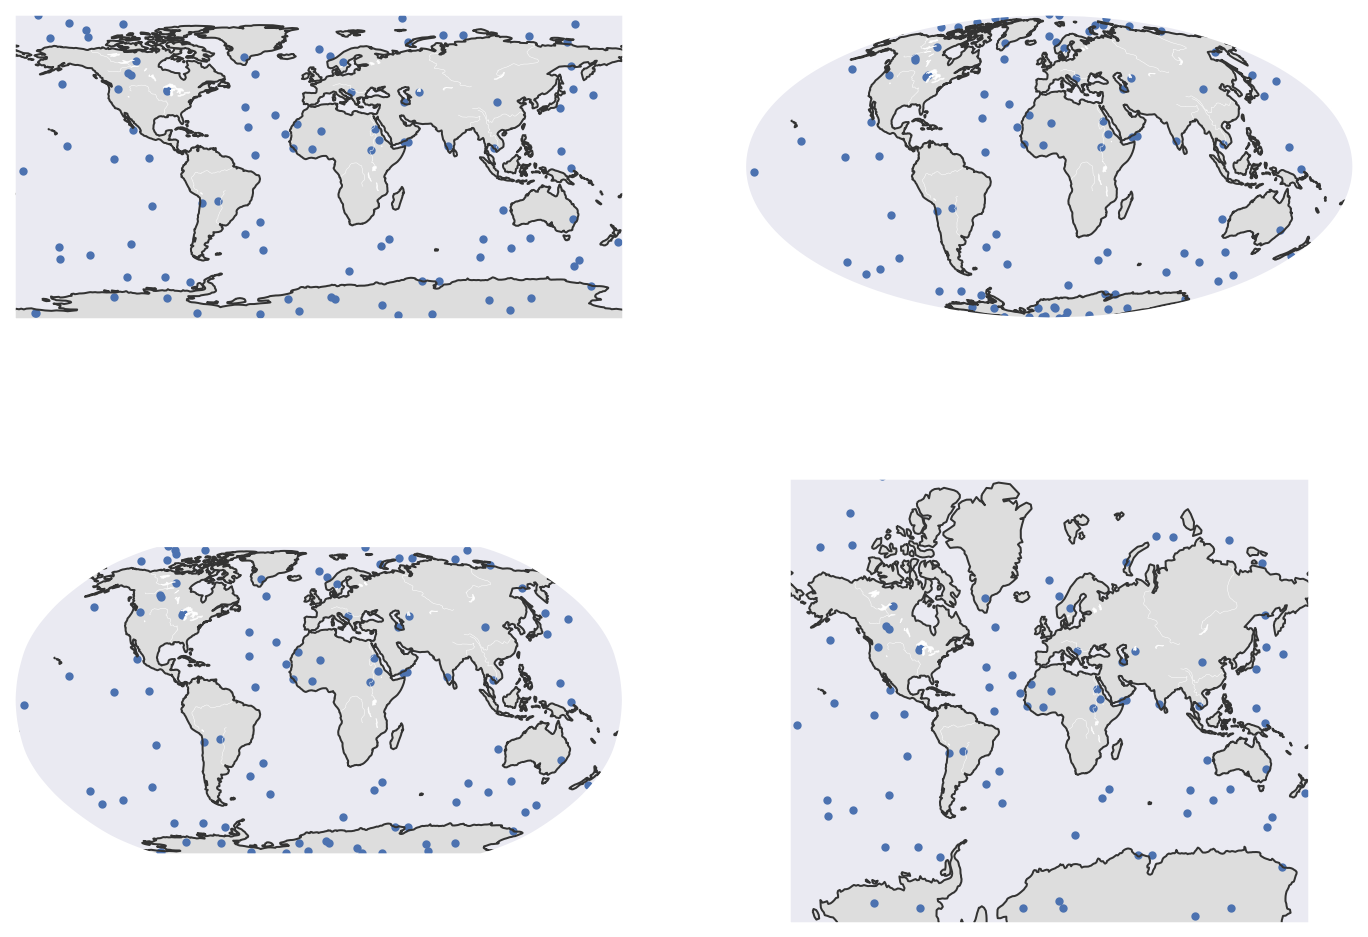

In [3]:
np.random.seed(1)
lon = 360 * np.random.rand(100)
lat = 180 * np.random.rand(100) - 90

fig = plt.figure(figsize=(12,9))

ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND, facecolor='#DDDDDD')
ax.add_feature(cartopy.feature.RIVERS, edgecolor='white', linewidth=.25)
ax.add_feature(cartopy.feature.LAKES, facecolor='white', linewidth=.25)
ax.scatter(lon, lat, s=10, transform=ccrs.PlateCarree())
# set visible part of the world (default is plotted part)
ax.set_global()
ax.coastlines(color='#333333') ;

ax = fig.add_subplot(2, 2, 2, projection=ccrs.Mollweide())
ax.add_feature(cartopy.feature.LAND, facecolor='#DDDDDD')
ax.add_feature(cartopy.feature.RIVERS, edgecolor='white', linewidth=.25)
ax.add_feature(cartopy.feature.LAKES, facecolor='white', linewidth=.25)
ax.scatter(lon, lat, s=10, transform=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(color='#333333') ;

ax = fig.add_subplot(2, 2, 3, projection=ccrs.Robinson())
ax.add_feature(cartopy.feature.LAND, facecolor='#DDDDDD')
ax.add_feature(cartopy.feature.RIVERS, edgecolor='white', linewidth=.25)
ax.add_feature(cartopy.feature.LAKES, facecolor='white', linewidth=.25)
ax.scatter(lon, lat, s=10, transform=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(color='#333333') ;

ax = fig.add_subplot(2, 2, 4, projection=ccrs.Mercator())
ax.add_feature(cartopy.feature.LAND, facecolor='#DDDDDD')
ax.add_feature(cartopy.feature.RIVERS, edgecolor='white', linewidth=.25)
ax.add_feature(cartopy.feature.LAKES, facecolor='white', linewidth=.25)
ax.scatter(lon, lat, s=10, transform=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(color='#333333') ;


#plt.tight_layout()

## Borders, rivers, lakes, and sea

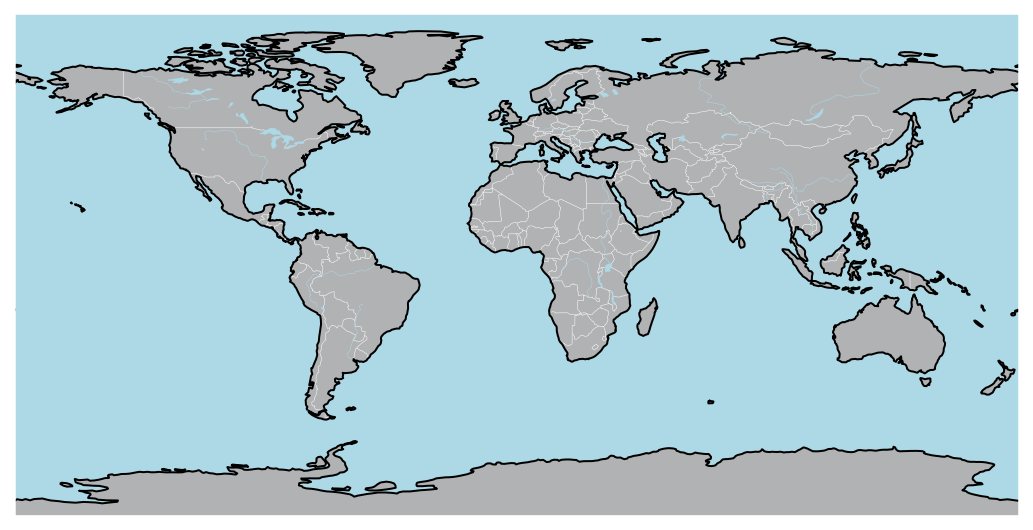

In [4]:

plt.close()

projection = ccrs.PlateCarree()

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(1, 1, 1, projection=projection)

ax.add_feature(cartopy.feature.LAND, zorder=0, linewidth=.001, facecolor='#B1B2B4')
ax.add_feature(cartopy.feature.OCEAN, facecolor='lightblue')
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=.25)
ax.add_feature(cartopy.feature.RIVERS, edgecolor='lightblue', linewidth=.25)
ax.add_feature(cartopy.feature.LAKES, facecolor='lightblue', linewidth=.25)

ax.coastlines(color='black')
#ax.outline_patch.set_edgecolor('white')

# set visible part of the world (default is plotted part)
ax.set_global()

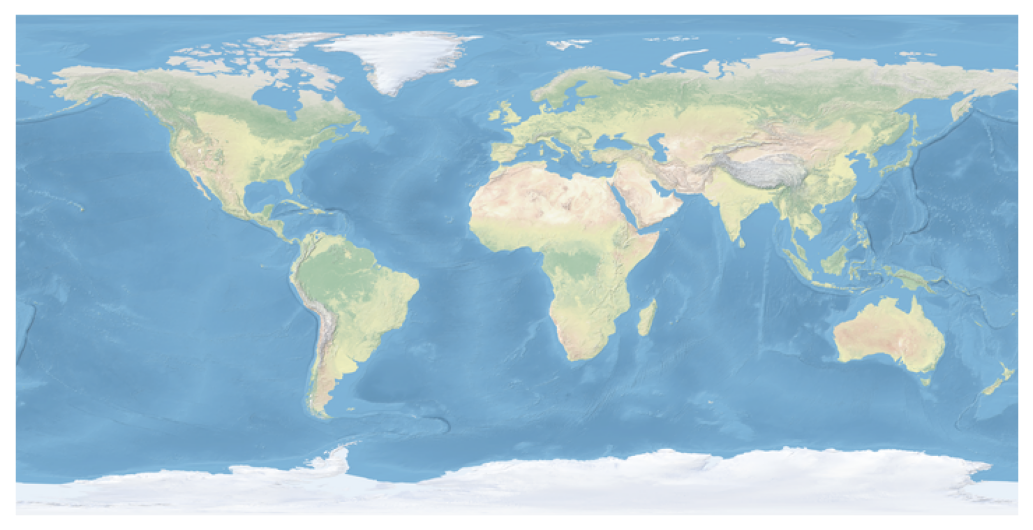

In [5]:
projection = ccrs.PlateCarree()

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(1, 1, 1, projection=projection)

ax.stock_img()

# set visible part of the world (default is plotted part)
ax.set_global()

## Different views of the globe

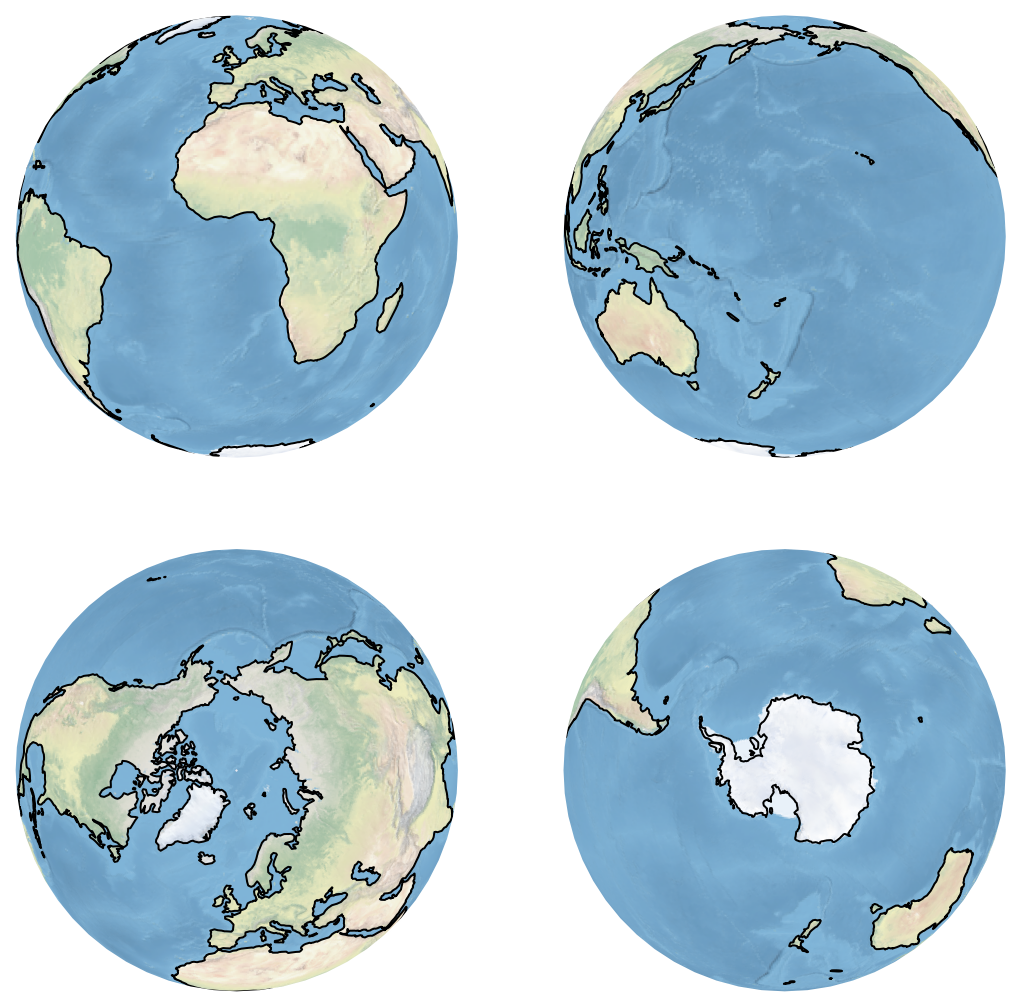

In [6]:
resolution='110m'
fig = plt.figure(figsize=(9,9))

ax = fig.add_subplot(2, 2, 1, projection=ccrs.Orthographic(central_longitude=0.0, central_latitude=0.0))
ax.stock_img()
ax.set_global()
ax.coastlines(color='black', resolution=resolution)

ax = fig.add_subplot(2, 2, 2, projection=ccrs.Orthographic(central_longitude=180.0, central_latitude=0.0))
ax.stock_img()
ax.set_global()
ax.coastlines(color='black', resolution=resolution)

ax = fig.add_subplot(2, 2, 3, projection=ccrs.Orthographic(central_longitude=0.0, central_latitude=90.0))
ax.stock_img()
ax.set_global()
ax.coastlines(color='black', resolution=resolution)

ax = fig.add_subplot(2, 2, 4, projection=ccrs.Orthographic(central_longitude=0.0, central_latitude=-90.0))
ax.stock_img()
ax.set_global()
ax.coastlines(color='black', resolution=resolution) ;

## Centered on Denmark

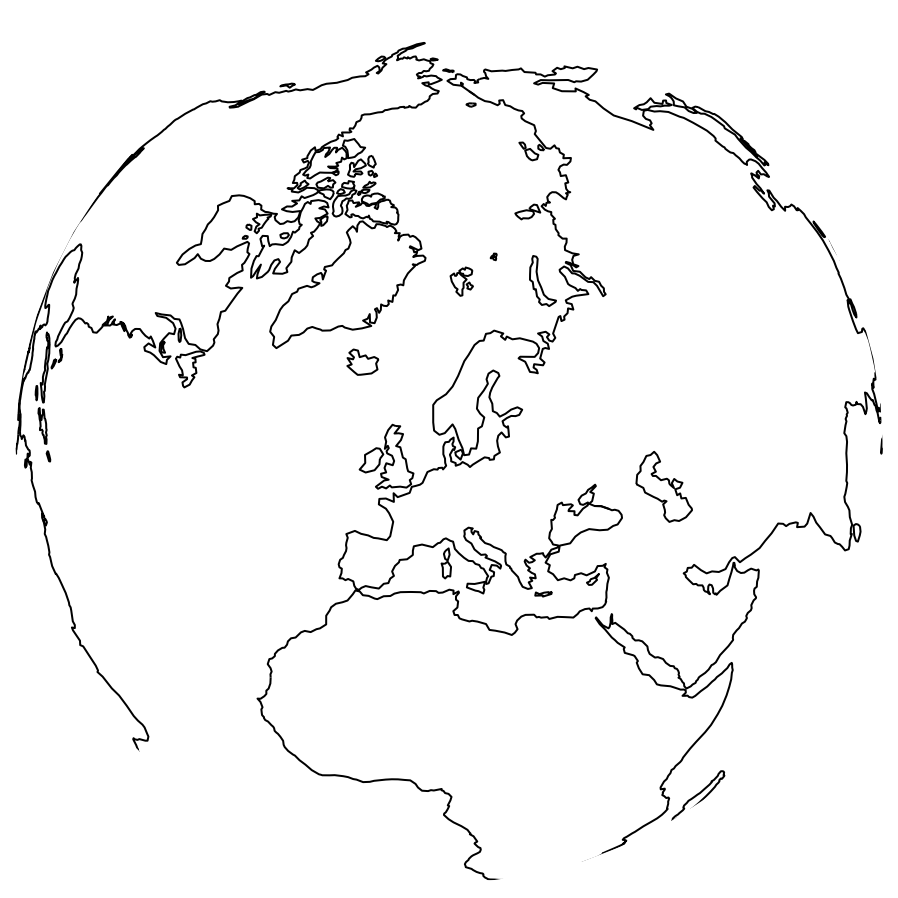

In [7]:
fig = plt.figure(figsize=(8,8))
resolution='110m'
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(central_longitude=9.5018, central_latitude=56.2639))
ax.set_facecolor('white')
#plt.setp(ax.spines.values(), color='grey') # set outline if missing
ax.set_global()
ax.coastlines(color='black', resolution=resolution)
ax.set_global()

## Denmark

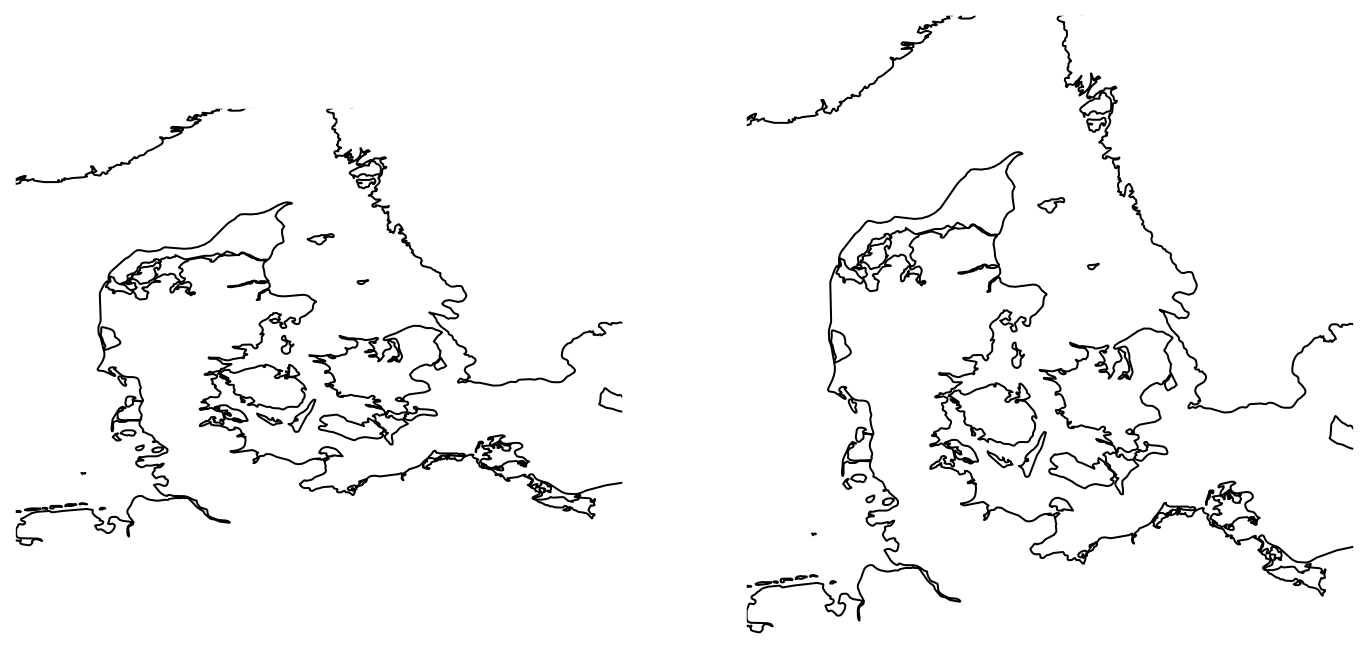

In [8]:
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())
ax.set_facecolor('white')
#plt.setp(ax.spines.values(), color='grey') # set border in newer versions

ax.coastlines(color='black', resolution='10m')
ax.set_extent([7, 15, 53, 59], crs= ccrs.PlateCarree())

ax = fig.add_subplot(1, 2, 2, projection=ccrs.Miller())
ax.set_facecolor('white')
#plt.setp(ax.spines.values(), color='grey') # set border in newer versions

ax.coastlines(color='black', resolution='10m')
ax.set_extent([7, 15, 53, 59], crs= ccrs.PlateCarree())

## Show a geographical region

/Users/kmt/anaconda3/envs/cartopy_maps/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.


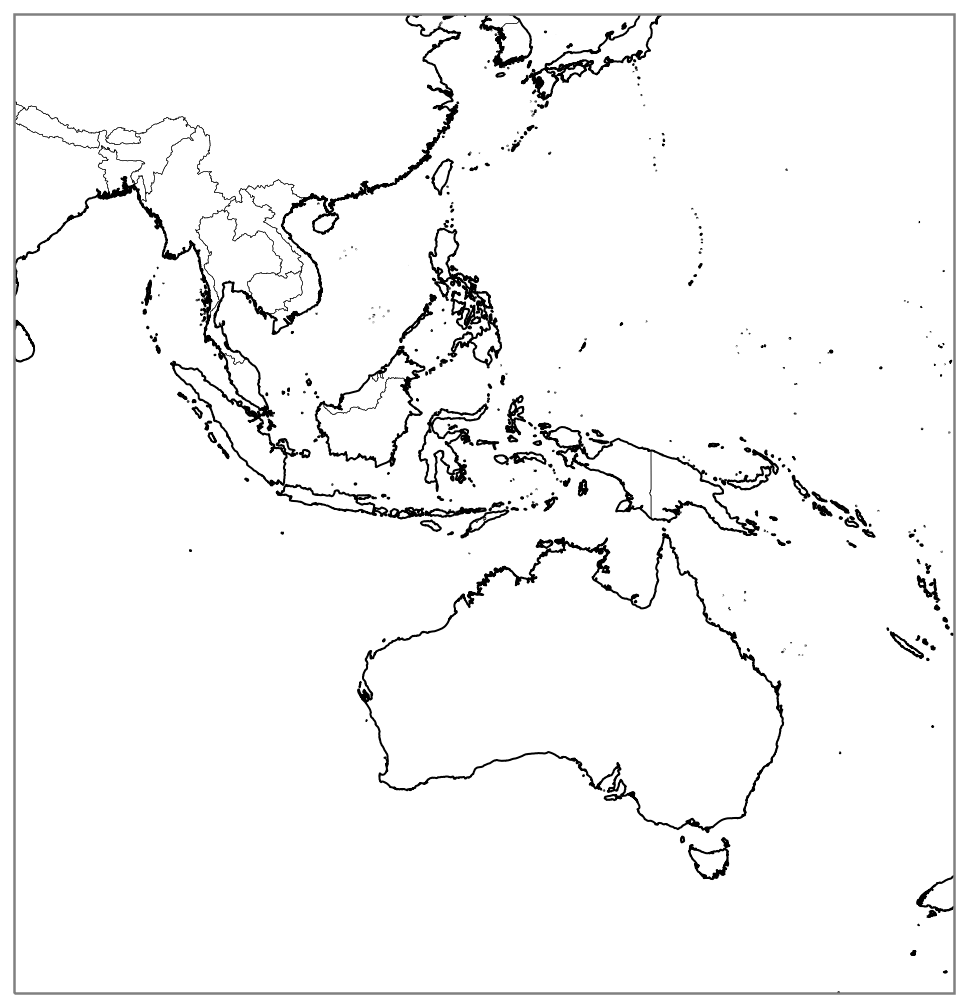

In [9]:
# map figure
projection = ccrs.PlateCarree()
#projection = ccrs.Orthographic(central_longitude=0.0, central_latitude=0.0)
resolution='10m'
#resolution='50m'
#resolution='110m'
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(1, 1, 1, projection=projection)
ax.set_facecolor('white')


# borders
#ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=.25)
# if you want border resolution other than 110m you need to use NaturalEarthFeature:
ax.add_feature(cartopy.feature.NaturalEarthFeature('cultural', 'admin_0_countries', edgecolor='black',
                                                   facecolor='none',
                                                   linewidth=.25,
                                                   scale=resolution))

# ax.add_feature(cartopy.feature.NaturalEarthFeature('cultural', 'populated_places',  color='red', edgecolor='red',
#                                                     facecolor='red', scale=resolution), zorder=4)

# frame of map
ax.outline_patch.set_edgecolor('grey') # set border in older versions
#plt.setp(ax.spines.values(), color='grey') # set border in newer versions

ax.coastlines(color='black', resolution=resolution)

# set visible part of the world (default is plotted part)
ax.set_extent([80, 170, -45, 30])
#ax.set_extent([-20, 40, 30, 70])

## Pretty clean map

/Users/kmt/anaconda3/envs/cartopy_maps/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  if __name__ == '__main__':


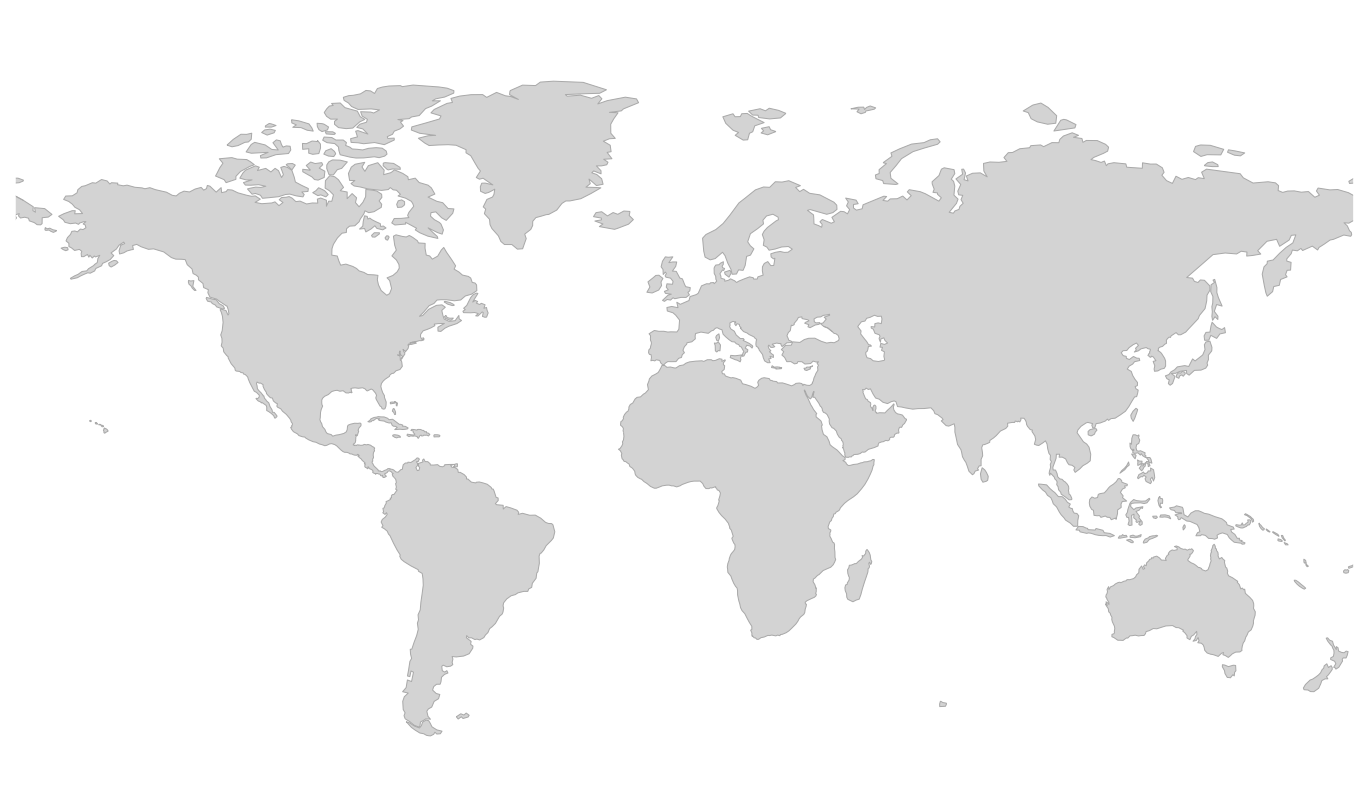

In [10]:
projection=ccrs.Miller()
resolution='110m'
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(1, 1, 1, projection=projection)
ax.set_facecolor('white')
ax.coastlines(color='darkgrey', resolution=resolution, linewidth=0.5)
ax.add_feature(cartopy.feature.LAND, zorder=0, linewidth=.001, facecolor='lightgrey')

ax.outline_patch.set_edgecolor('white') # set border in older versions
#plt.setp(ax.spines.values(), color='white') # set border in newer versions

ax.set_extent([-170, 180, 90, -63])

##  Drop shadow

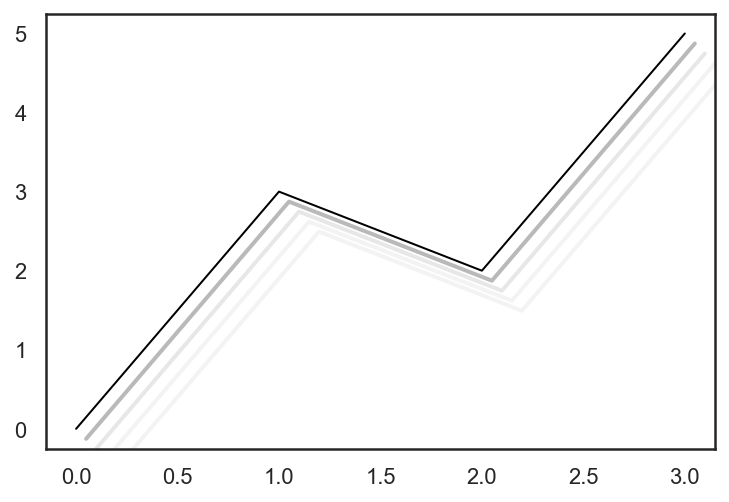

In [11]:
from matplotlib import patheffects

def drop_shadow(scale=1):
    return [patheffects.SimpleLineShadow(alpha=a, offset=(o,-o), linewidth=2) for a, o in \
            [(0.3, scale*0.5), (0.1, scale*1), (0.05, scale*1.5), (0.05, scale*2)] ] + [patheffects.Normal()]

with sns.axes_style('white'):
    plt.plot([0, 3, 2, 5], linewidth=1, color='black', path_effects=drop_shadow(scale=10))

/Users/kmt/anaconda3/envs/cartopy_maps/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  if __name__ == '__main__':


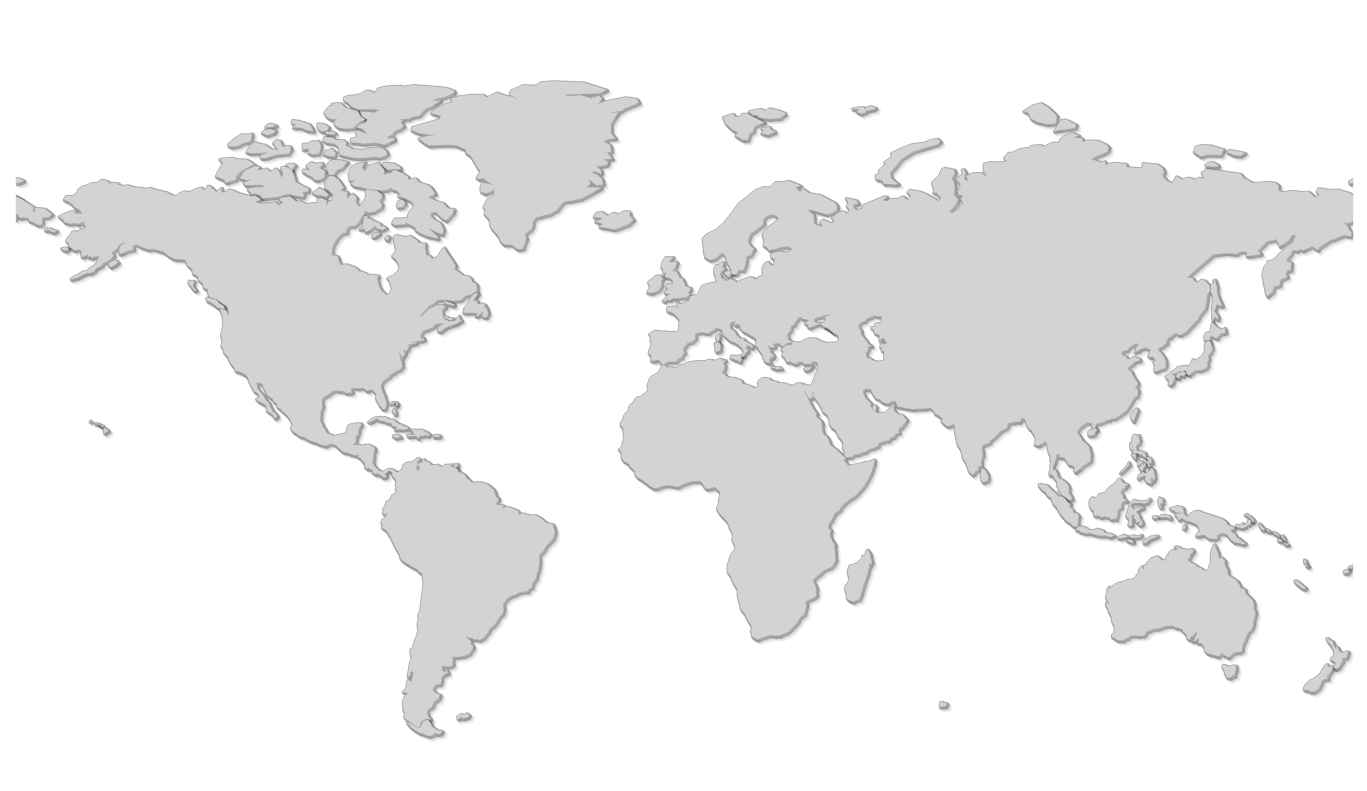

In [12]:
projection=ccrs.Miller()
resolution='110m'
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(1, 1, 1, projection=projection)
ax.set_facecolor('white')
ax.coastlines(color='darkgrey', resolution=resolution, linewidth=0.5, path_effects=drop_shadow(), zorder=0)
ax.add_feature(cartopy.feature.LAND, zorder=0, linewidth=.001, facecolor='lightgrey')

ax.outline_patch.set_edgecolor('white') # set border in older versions
#plt.setp(ax.spines.values(), color='white') # set border in newer versions

ax.set_extent([-179, 180, 90, -63])

## Five color mapping

### Backtracking Algorithm

The idea is to assign colors one by one to different vertices, starting from the vertex 0. Before assigning a color, we check for safety by considering already assigned colors to the adjacent vertices. If we find a color assignment which is safe, we mark the color assignment as part of solution. If we do not a find color due to clashes then we backtrack and return false.

In [13]:


# neigboring countries
# https://en.wikipedia.org/wiki/List_of_political_and_geographic_borders
countries_df = pd.read_table('countries.csv', sep=';').fillna('')

neighbors = dict()
for tup in countries_df.itertuples():
    lst = tup.Neighbors.split(' / ')
    if lst == ['']:
        lst = []
    neighbors[tup.Country] = lst

nr_countries = len(neighbors)
countries = sorted(neighbors)

# graph matrix of neighbors
graph = pd.DataFrame(dict((x, [0]*nr_countries) for x in countries), index=countries)
for c, n in neighbors.items():
    l = [x for x in n if x in countries]
    graph.loc[l, c] = 1
    

# country shape info
shpfilename = shpreader.natural_earth(resolution=resolution,
                                      category='cultural',
                                      name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
records = reader.records()
info = dict((r.attributes['NAME_LONG'], r) for r in records)

# five map colors
#colors = ['pink', 'lightgreen', 'lightblue', 'orange', 'yellow']
colors = ['#EEEEEE', '#E8E8E8', '#DDDDDD', '#D8D8D8', '#CCCCCC']

# get order in which countries should be colored
stack = list()
while len(graph):
    assert graph.sum().min() < 5
    country = graph.sum().idxmin()
    stack.append(country)
    graph.drop(country, axis=0, inplace=True)
    graph.drop(country, axis=1, inplace=True)

def get_color(name, already_colored):
    lst = list()
    for n in neighbors[name]:
        if n in already_colored:
            lst.append(already_colored[n])    
    return random.choice([x for x in colors if x not in lst])

# color countries popped off stack
country_colors = dict()
for name in reversed(stack):
    country_colors[name] = get_color(name, country_colors)

/Users/kmt/anaconda3/envs/cartopy_maps/lib/python3.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.


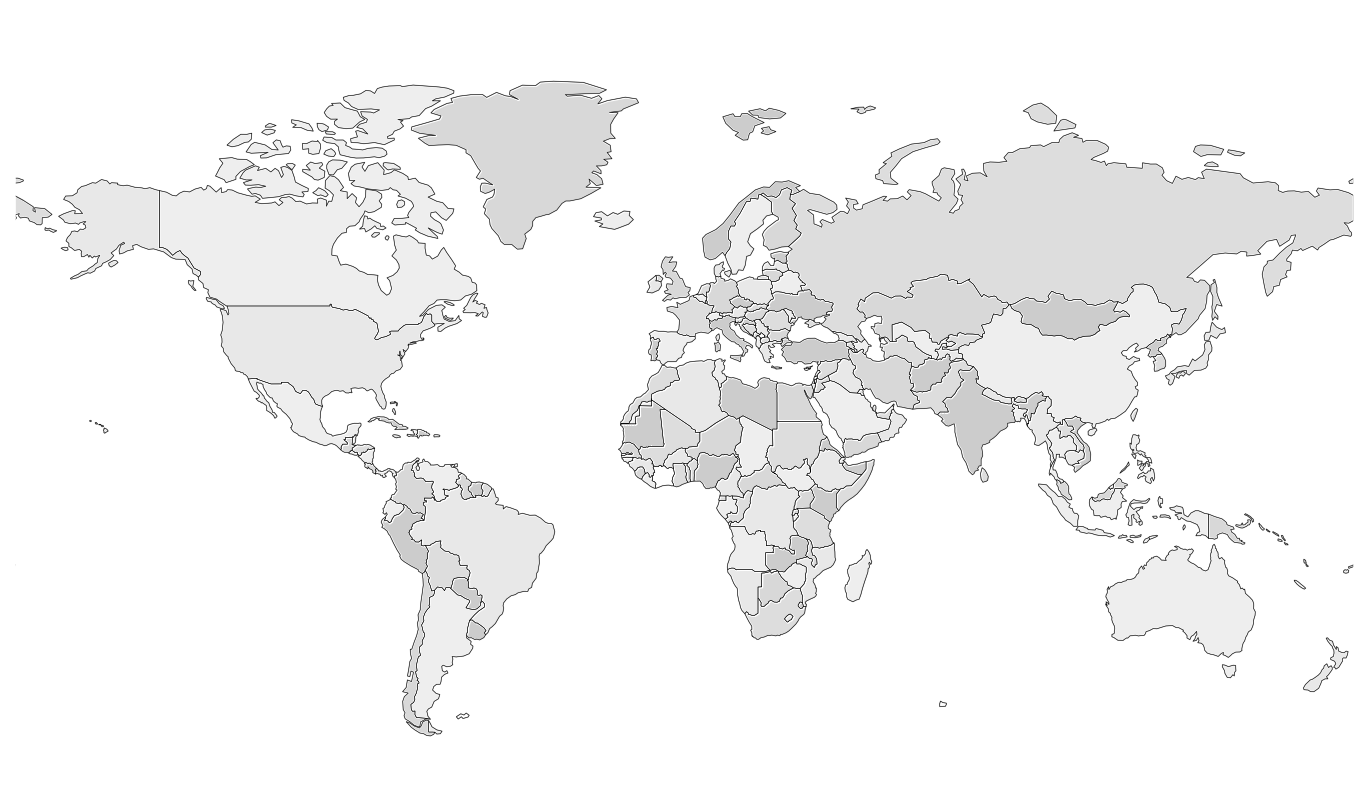

In [14]:
projection=ccrs.Miller()
resolution='110m'
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(1, 1, 1, projection=projection)
ax.set_facecolor('white')

for name, color in country_colors.items():
    try:
        country = info[name]
    except KeyError:        
        continue
    ax.add_geometries([country.geometry], ccrs.PlateCarree(), facecolor=color, label=name)

ax.coastlines(color='darkgrey', resolution=resolution, linewidth=0.5)

# borders
# if you want border resolution other than 110m you need to use NaturalEarthFeature:
ax.add_feature(cartopy.feature.NaturalEarthFeature('cultural', 'admin_0_countries', edgecolor='black',
                                                   facecolor='none',
                                                   linewidth=.25,
                                                   scale=resolution))
ax.outline_patch.set_edgecolor('white') # set border in older versions
#plt.setp(ax.spines.values(), color='white') # set border in newer versions

# set visible part of the world (default is plotted part)
ax.set_extent([-179, 180, 90, -63])

/Users/kmt/anaconda3/envs/cartopy_maps/lib/python3.7/site-packages/ipykernel_launcher.py:39: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.


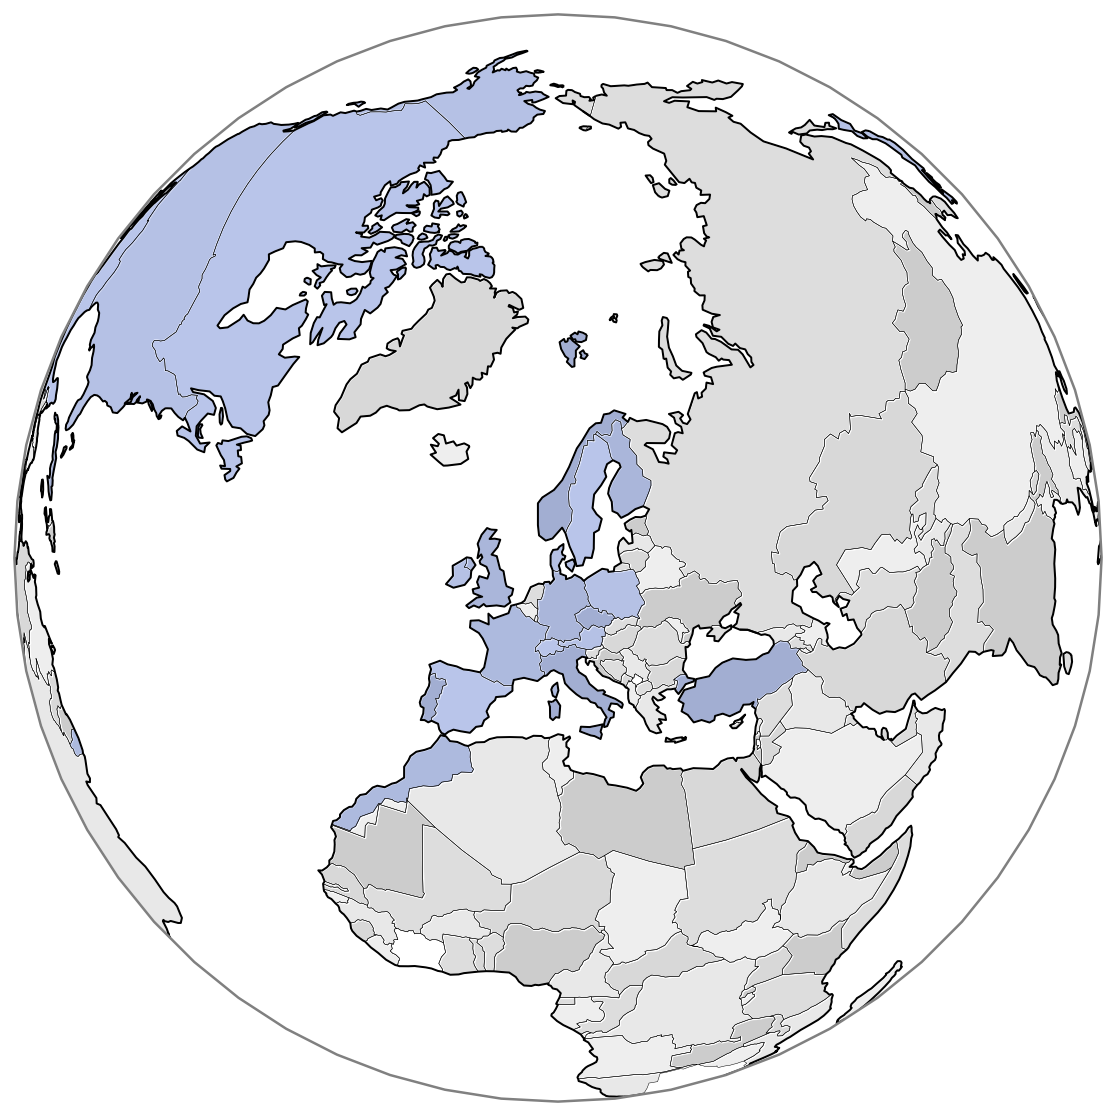

In [15]:
# map figure
#projection = ccrs.PlateCarree()
#projection=ccrs.Miller()
projection=ccrs.Orthographic(central_longitude=9.5018, central_latitude=56.2639)
#projection = ccrs.Orthographic(central_longitude=0.0, central_latitude=0.0)
#resolution='10m' 
#resolution='50m'
resolution='110m'
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, projection=projection)
ax.set_facecolor('white')

for name, color in country_colors.items():
    try:
        country = info[name]
    except KeyError:        
        continue
    ax.add_geometries([country.geometry], ccrs.PlateCarree(), facecolor=color, label=name)

# shade blue of countries I have been to 
where_i_have_been = ['Denmark', 'Germany', 'Sweden', 'Norway', 'Finland', 'United Kingdom', 'Ireland',
                     'Poland', 'France', 'Austria', 'Switzerland', 'Spain', 'Portugal', 'Italy', 'Czech Republic', 
                     'Morocco', 'Turkey', 'Cuba', 'United States', 'Canada', 'Mexico', 'Japan']
for name in where_i_have_been:
    color='royalblue'
    country = info[name]
    ax.add_geometries([country.geometry], ccrs.PlateCarree(),
                      facecolor=color,
                      label=name, alpha=0.3)
    
# borders
#ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=.25)
# if you want border resolution other than 110m you need to use NaturalEarthFeature:
ax.add_feature(cartopy.feature.NaturalEarthFeature('cultural', 'admin_0_countries', edgecolor='black',
                                                   facecolor='none',
                                                   linewidth=.25,
                                                   scale=resolution))
# frame of map
ax.outline_patch.set_edgecolor('grey') # set border in older versions
#plt.setp(ax.spines.values(), color='grey') # set border in newer versions)

# coastline
ax.coastlines(color='black', resolution=resolution)

# set visible part of the world (default is plotted part)
ax.set_global()

## Facets with seaborn

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import cartopy.crs
import cartopy.feature

In [17]:
df = pd.read_table('urbanareas.tsv')
df = pd.melt(df, id_vars=['City', 'City_Alternate', 'Country', 'Latitude', 'Longitude', 'Country_ISO3'],
             value_name='Population')
df['Year'] = df['variable'].str.slice(3, 7).astype(int)
df['PopulationCategory'] = pd.cut(df['Population'], [0, 1000, 2000, 3000, 5000, 100000], right=False)

In [18]:
df.head()

City City_Alternate   Country  Latitude  Longitude Country_ISO3  \
0        Sofia            NaN  Bulgaria     42.70      23.33          BGR   
1     Mandalay            NaN   Myanmar     21.97      96.08          MMR   
2  Nay Pyi Taw            NaN   Myanmar     19.75      96.10          MMR   
3       Yangon        Rangoon   Myanmar     16.87      96.12          MMR   
4        Minsk            NaN   Belarus     53.89      27.57          BLR   

  variable  Population  Year PopulationCategory  
0  pop1950       520.0  1950          [0, 1000)  
1  pop1950       170.0  1950          [0, 1000)  
2  pop1950         0.0  1950          [0, 1000)  
3  pop1950      1300.0  1950       [1000, 2000)  
4  pop1950       280.0  1950          [0, 1000)

/Users/kmt/anaconda3/envs/cartopy_maps/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


ValueError: zero-size array to reduction operation minimum which has no identity

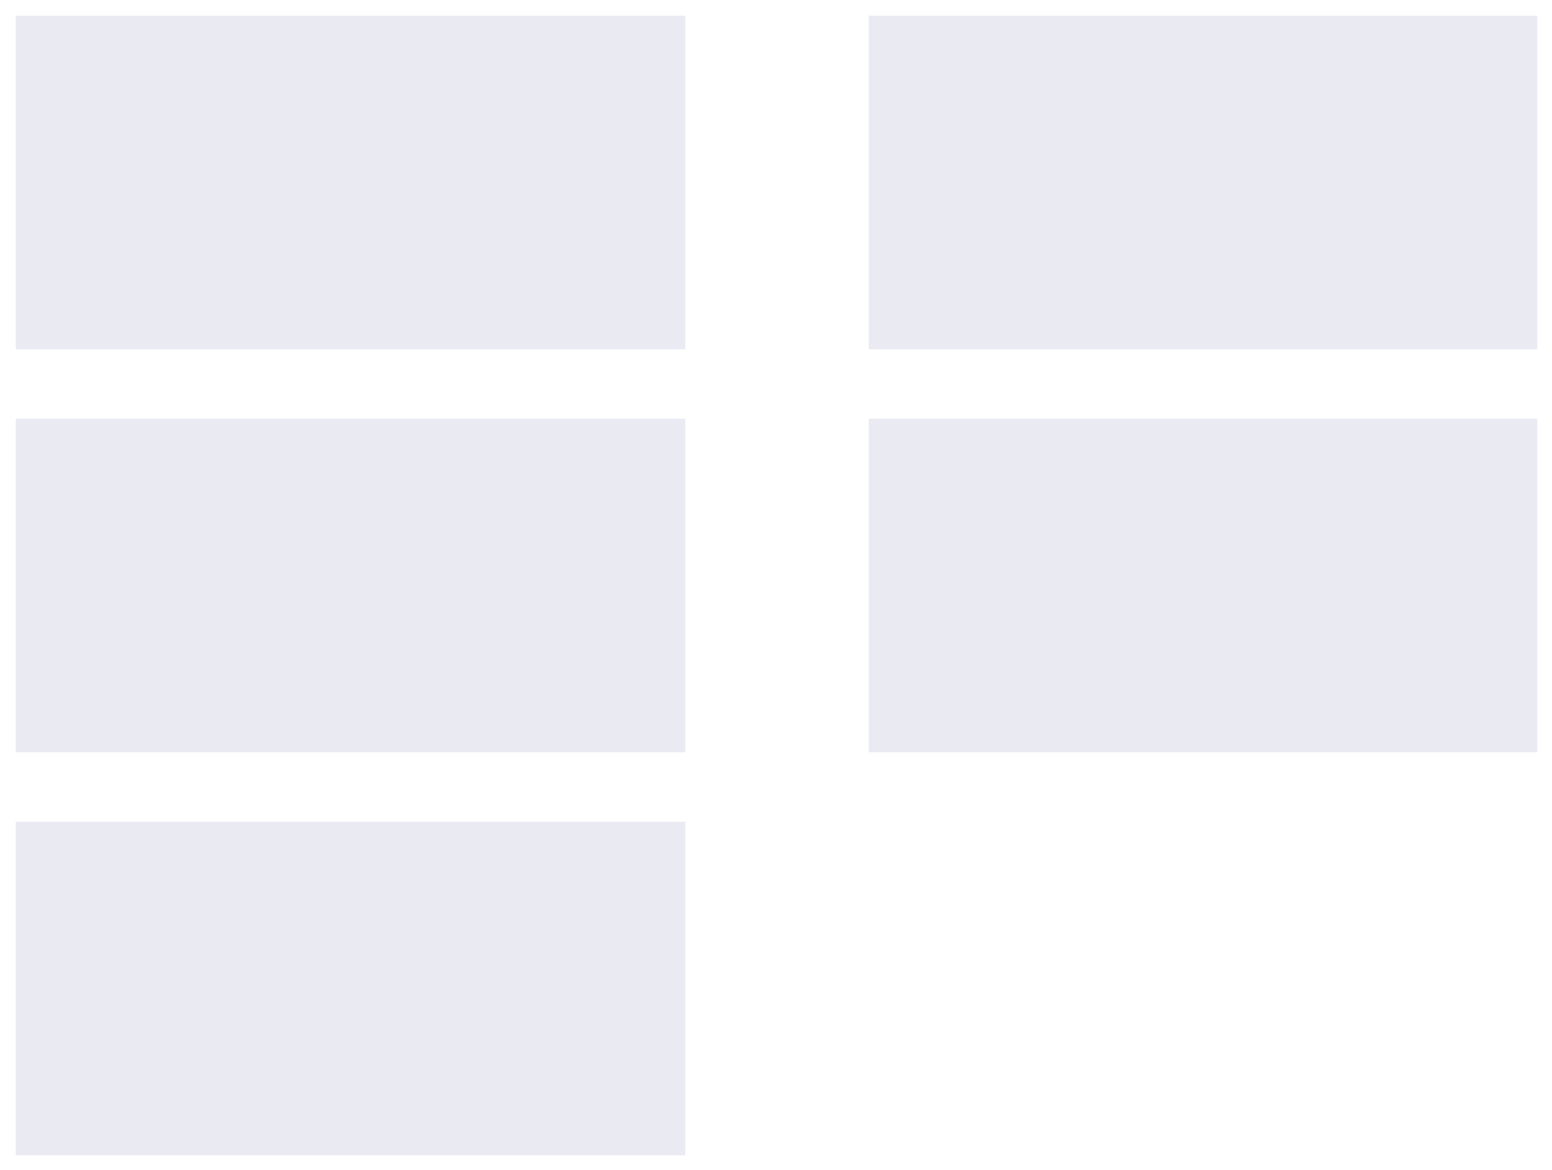

In [19]:
def scatterplot(x, y, s, color=None, **kwargs):
    # the default plt.scatter handles size scaling poorly, so we define our own
    # see also: https://github.com/mwaskom/seaborn/issues/315
    scaled_size = 0.01 * s
#     plt.scatter(x, y, s=scaled_size, edgecolor=color, facecolor='none', linewidth=1, **kwargs)
    plt.scatter(x, y, s=scaled_size, edgecolor='none', linewidth=1, **kwargs)

g = sns.FacetGrid(df[df['Year'] % 25 == 0], col="Year", hue='PopulationCategory',
                  col_wrap=2, size=3.5, aspect=2, palette="Set1",#sns.dark_palette('Red', 5),
                  subplot_kws=dict(projection=cartopy.crs.PlateCarree()))
g.map(scatterplot, "Longitude", "Latitude", "Population",
      transform=cartopy.crs.PlateCarree(), zorder=10)
for ax in g.axes.ravel():
    ax.add_feature(cartopy.feature.COASTLINE)
    ax.add_feature(cartopy.feature.BORDERS)
    ax.outline_patch.set_edgecolor('white')
    #plt.setp(ax.spines.values(), color='white')
    ax.set_global()

# Maps with Geoplot

In [25]:
import geoplot as gplt
import geoplot.crs as gcrs
import geopandas as gpd

world = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)

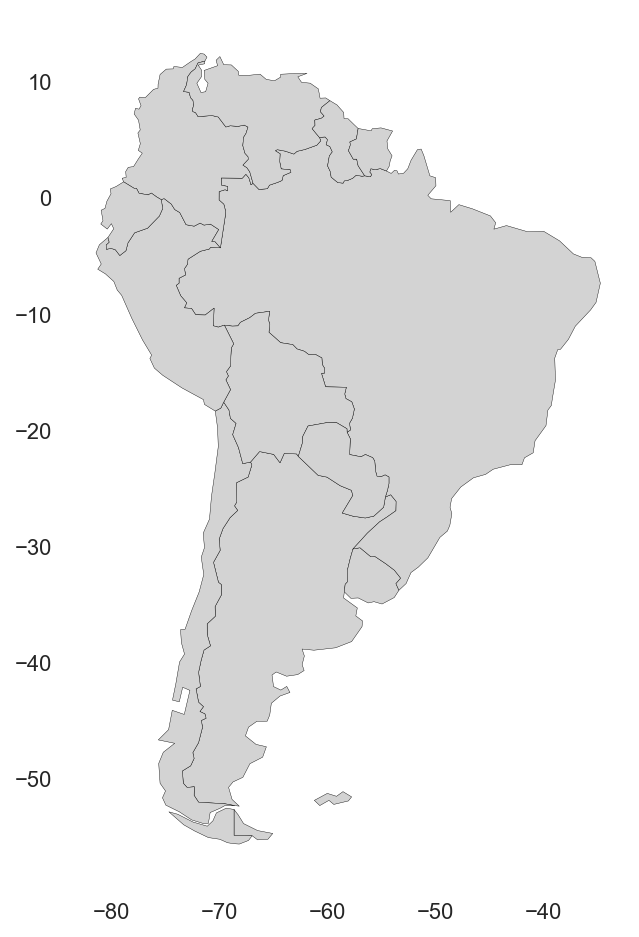

In [26]:
ax = world[world.continent == 'South America'].plot(
    edgecolor='black', 
    facecolor='lightgray',
    linewidth=0.2,
    figsize=(8, 8))
ax.set_facecolor('white')

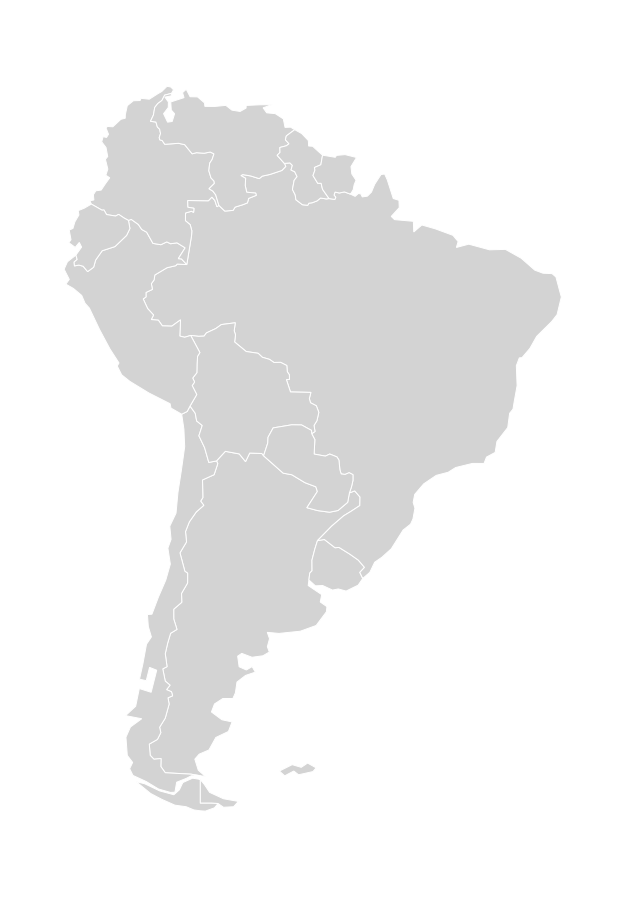

In [27]:
continent = world[world.continent == 'South America']
ax = gplt.polyplot(continent,
    edgecolor='white', 
    facecolor='lightgray',
    linewidth=0.5,
    figsize=(8, 8))
ax.set_facecolor('white')

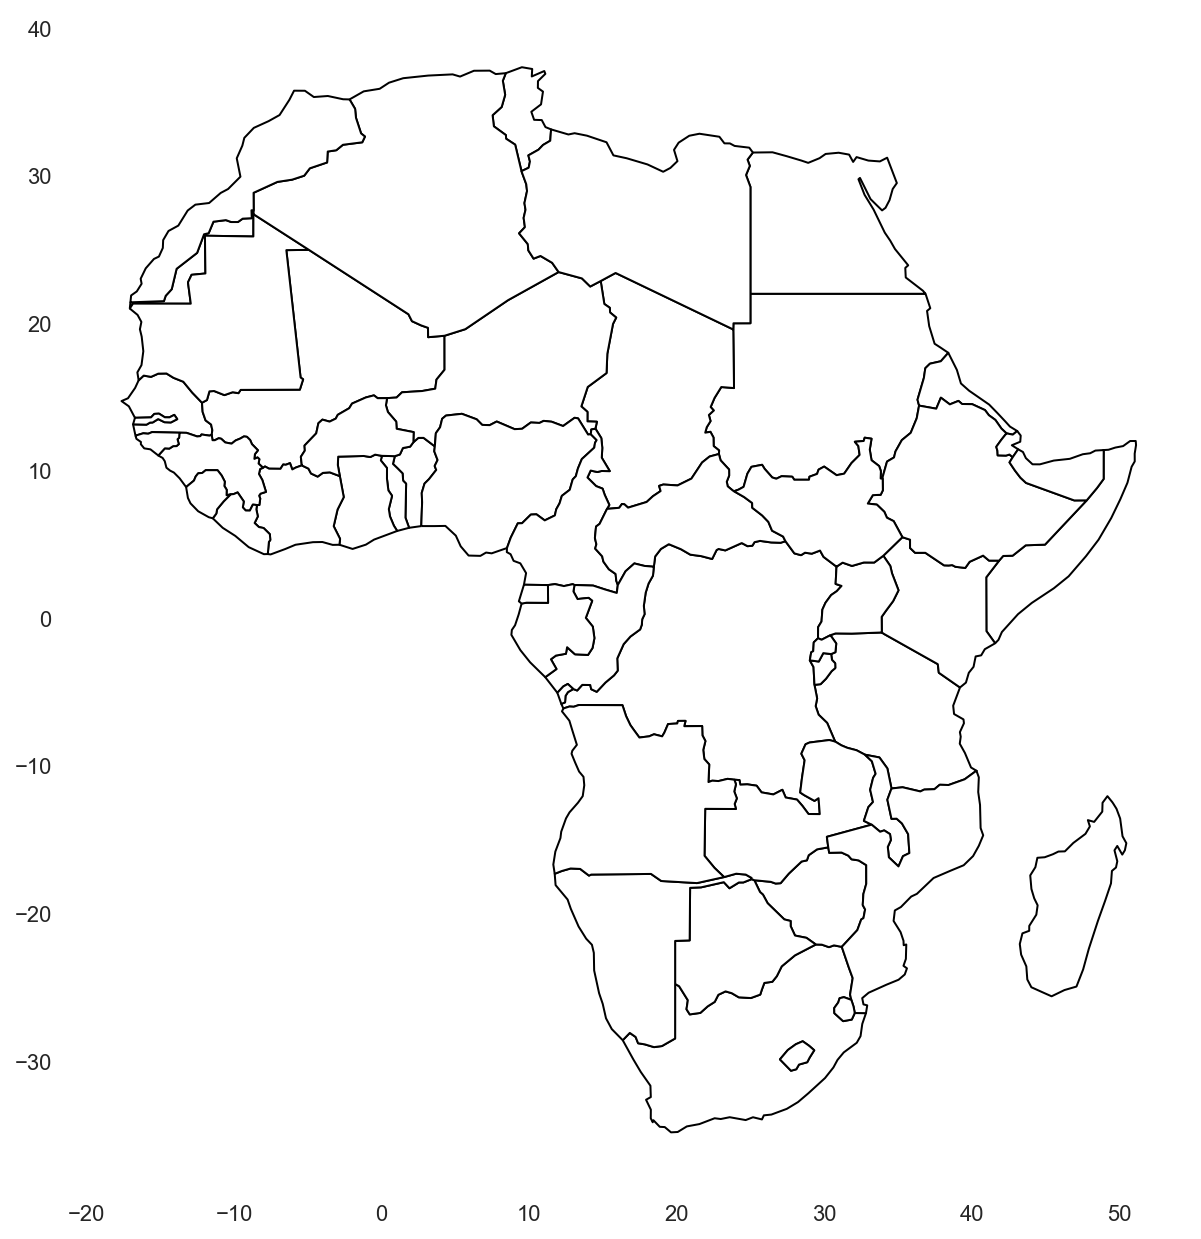

In [28]:
ax = world[world.continent == 'Africa'].plot(
    color='white', edgecolor='black',  figsize=(10, 12))
ax.set_facecolor('white')

In [29]:
np.random.seed(1)
lon = 360 * np.random.rand(1000) - 180
lat = 180 * np.random.rand(1000) - 90

df = pd.DataFrame(dict(lon=lon, lat=lat, val=np.random.rand(1000)))

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))
gdf.head()

lon        lat       val                     geometry
0  -29.872078 -31.354206  0.576978  POINT (-29.87208 -31.35421)
1   79.316818  70.168921  0.875389    POINT (79.31682 70.16892)
2 -179.958825  45.307390  0.608565  POINT (-179.95883 45.30739)
3  -71.160274  47.273777  0.251660   POINT (-71.16027 47.27378)
4 -127.167879  -5.493775  0.296130  POINT (-127.16788 -5.49377)

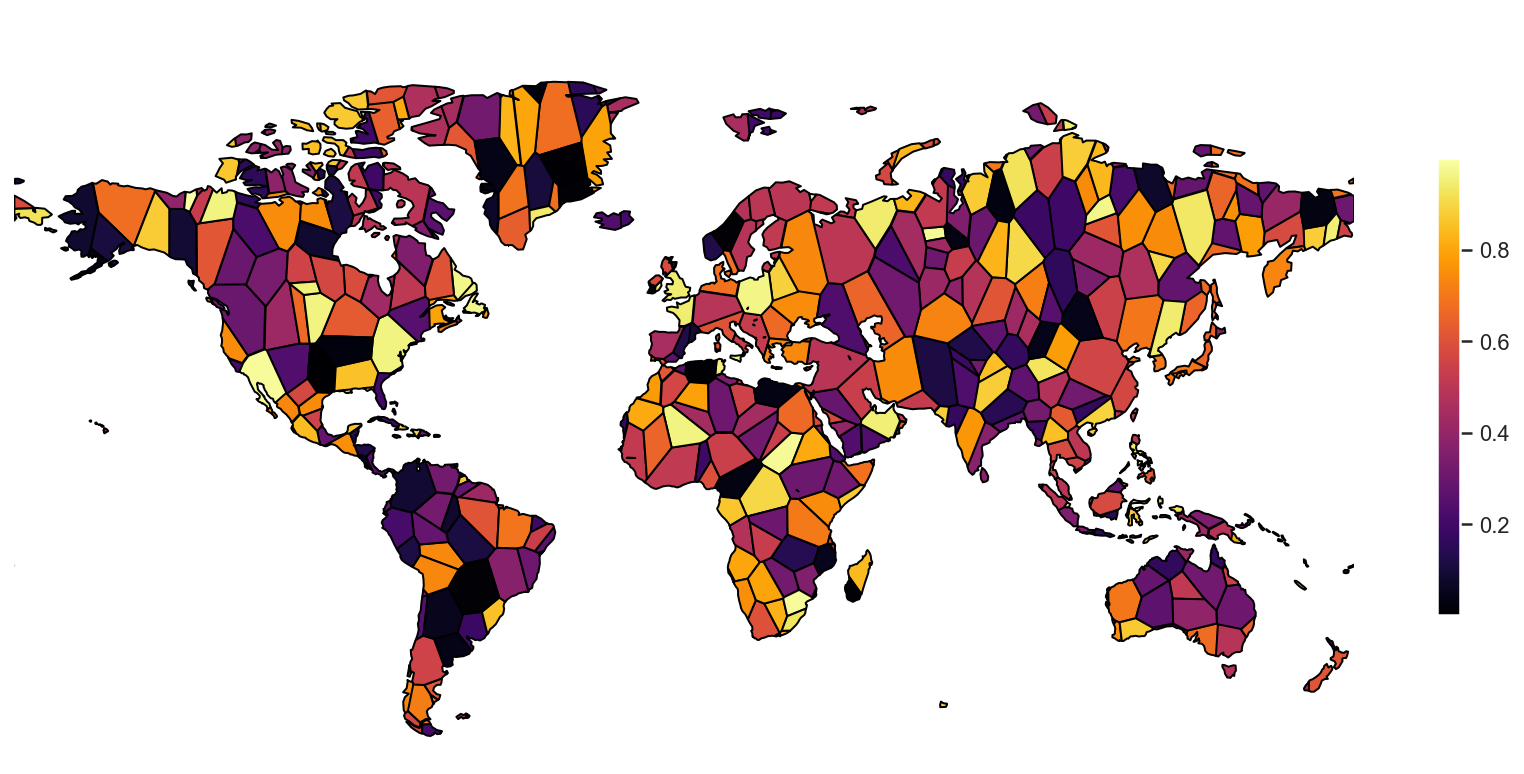

In [30]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)

    world = gpd.read_file(
        gpd.datasets.get_path('naturalearth_lowres')
    )

    scheme = None#mc.NaturalBreaks(gdf['val'], k=10)
    ax = gplt.voronoi(
        gdf, projection=gcrs.Miller(),
        clip=world.simplify(0.001),
        hue='val', scheme=scheme, cmap='inferno',
        legend=True,
        legend_kwargs=dict(shrink=0.6),
        figsize=(15, 7)
    )
    sc = gplt.polyplot(world, ax=ax, projection=gcrs.Miller(),
                       extent=(-180, -60, 180, 90), edgecolor='lightgray', facecolor='lightgrey', linewidth=0.2)

    ax.set_facecolor('white') ;

In [31]:
warnings.filterwarnings("ignore", category=UserWarning)

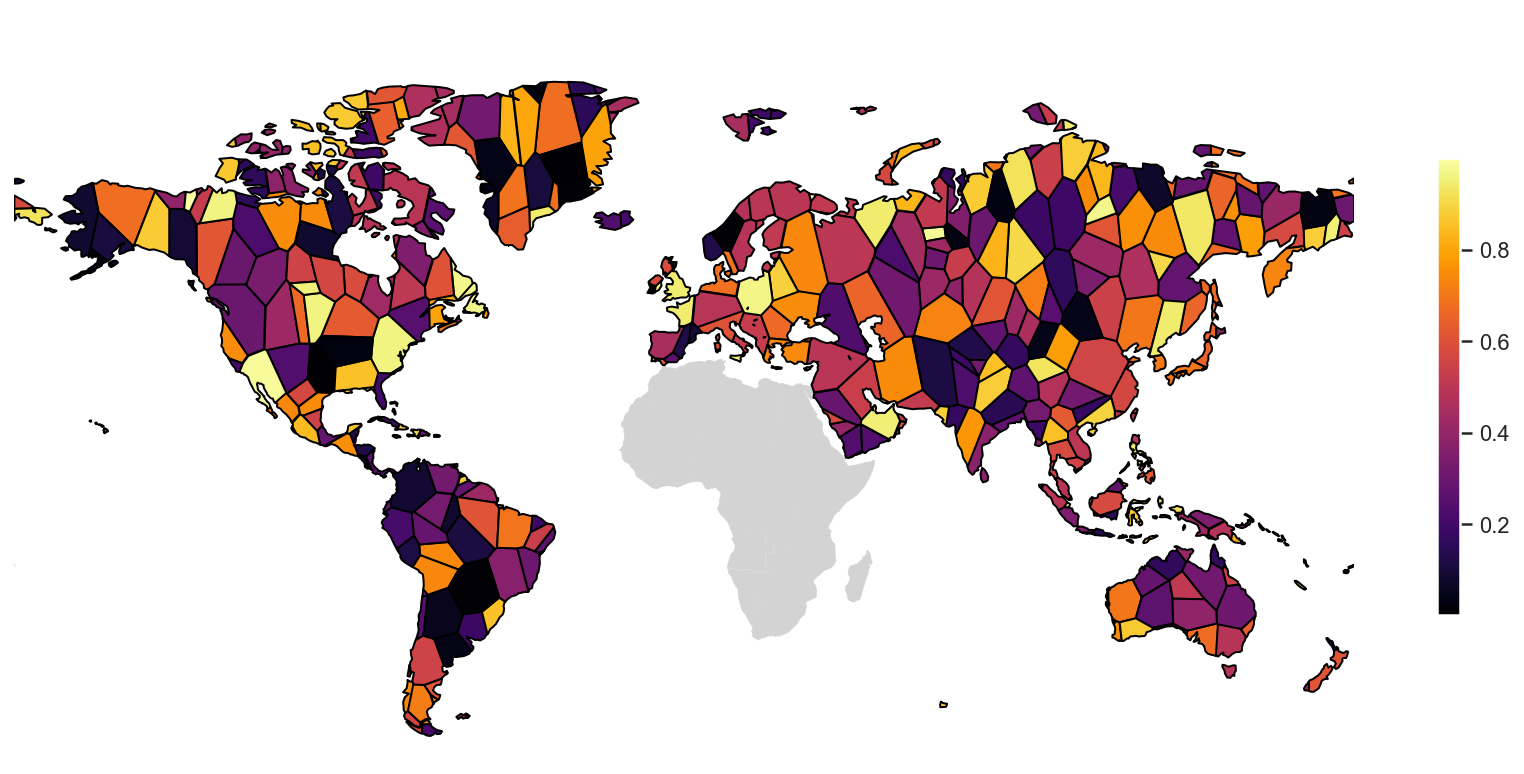

In [32]:
world = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)

non_africa = ax = world[world.continent != 'Africa']

scheme = None#mc.NaturalBreaks(gdf['val'], k=10)
ax = gplt.voronoi(
    gdf, projection=gcrs.Miller(),
    clip=non_africa.simplify(0.001),
    hue='val', scheme=scheme, cmap='inferno',
    legend=True,
    legend_kwargs=dict(shrink=0.6),
    figsize=(15, 7)
)
sc = gplt.polyplot(world, ax=ax, projection=gcrs.Miller(),
                   extent=(-180, -60, 180, 90), edgecolor='lightgray', facecolor='lightgrey', linewidth=0.2)

ax.set_facecolor('white') ;

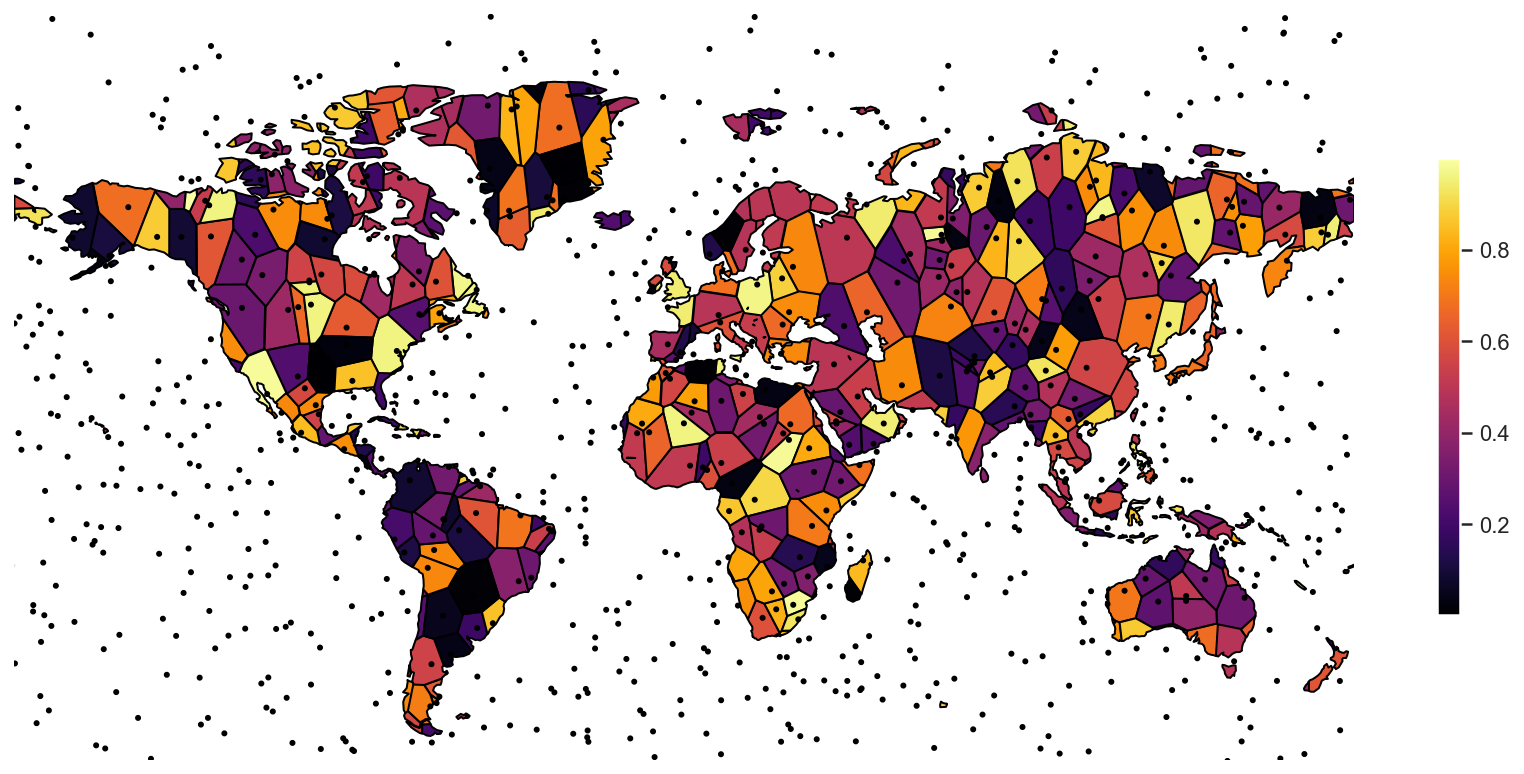

In [33]:
world = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)

scheme = None#mc.NaturalBreaks(gdf['val'], k=10)
ax = gplt.voronoi(
    gdf, projection=gcrs.Miller(),
    clip=world.simplify(0.001),
    hue='val', scheme=scheme, cmap='inferno',
    legend=True,
    legend_kwargs=dict(shrink=0.6),
    figsize=(15, 7)
)
sc = gplt.polyplot(world, ax=ax, projection=gcrs.Miller(),
                   extent=(-180, -60, 180, 90), edgecolor='lightgray', facecolor='lightgrey', linewidth=0.2)

gplt.pointplot(
    gdf, projection=gcrs.Miller(),
    ax=ax, zorder=10, s=2, color='black',
    extent=(-180, -60, 180, 90)
)

ax.set_facecolor('white') ;

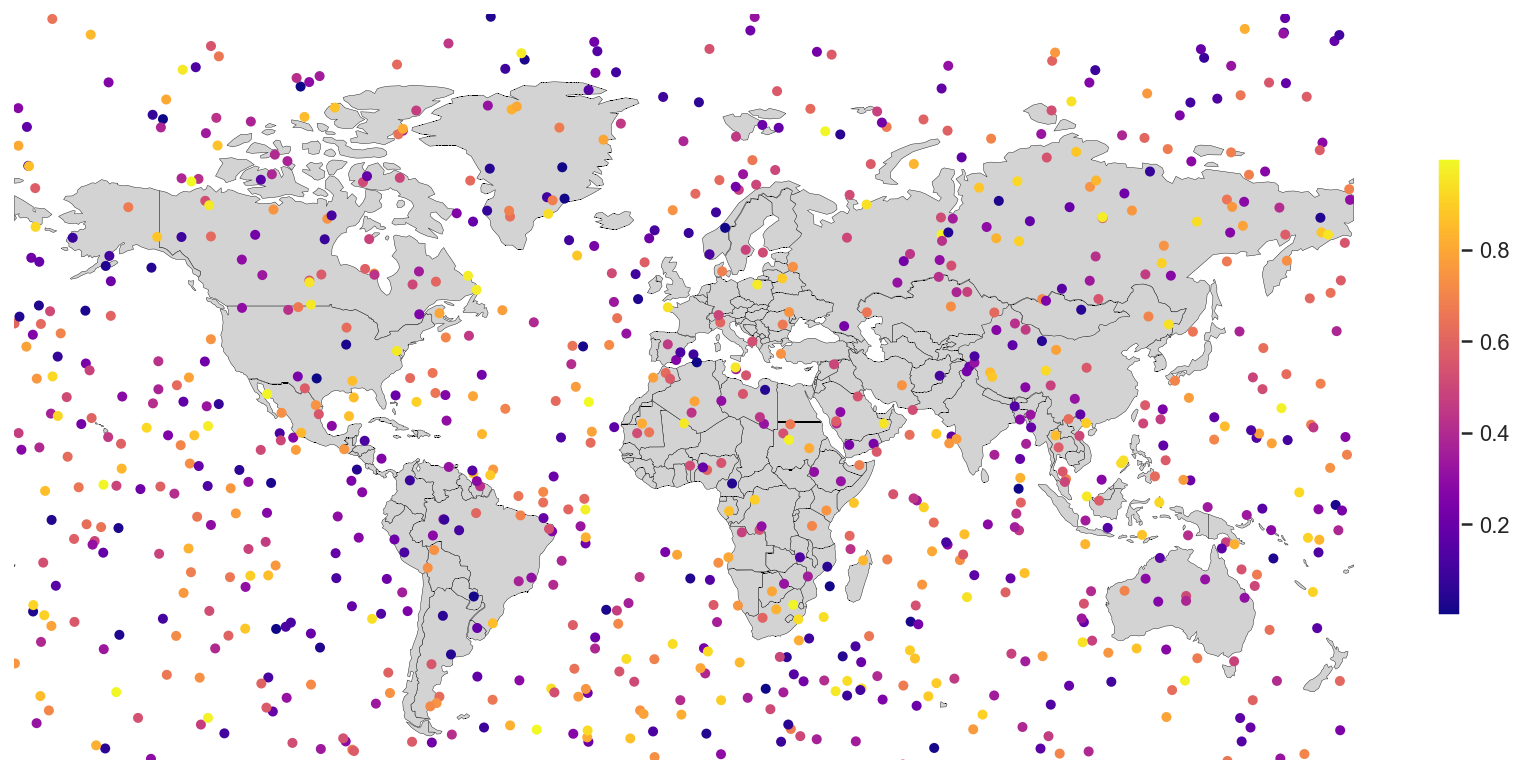

In [34]:
world = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)

ax = gplt.polyplot(world, projection=gcrs.Miller(),
                   extent=(-180, -60, 180, 90), figsize=(15, 7), 
                   edgecolor='black', facecolor='lightgrey', linewidth=0.2)


gplt.pointplot(gdf,
    projection=gcrs.Miller(),
    scheme=None,
    hue='val', cmap='plasma',
    ax=ax, zorder=10, s=4,
    extent=(-180, -60, 180, 90),
    legend=True,
    legend_kwargs=dict(shrink=0.6)
              )

ax.set_facecolor('white') ;

/Users/kmt/anaconda3/envs/cartopy_maps/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<GeoAxesSubplot:>

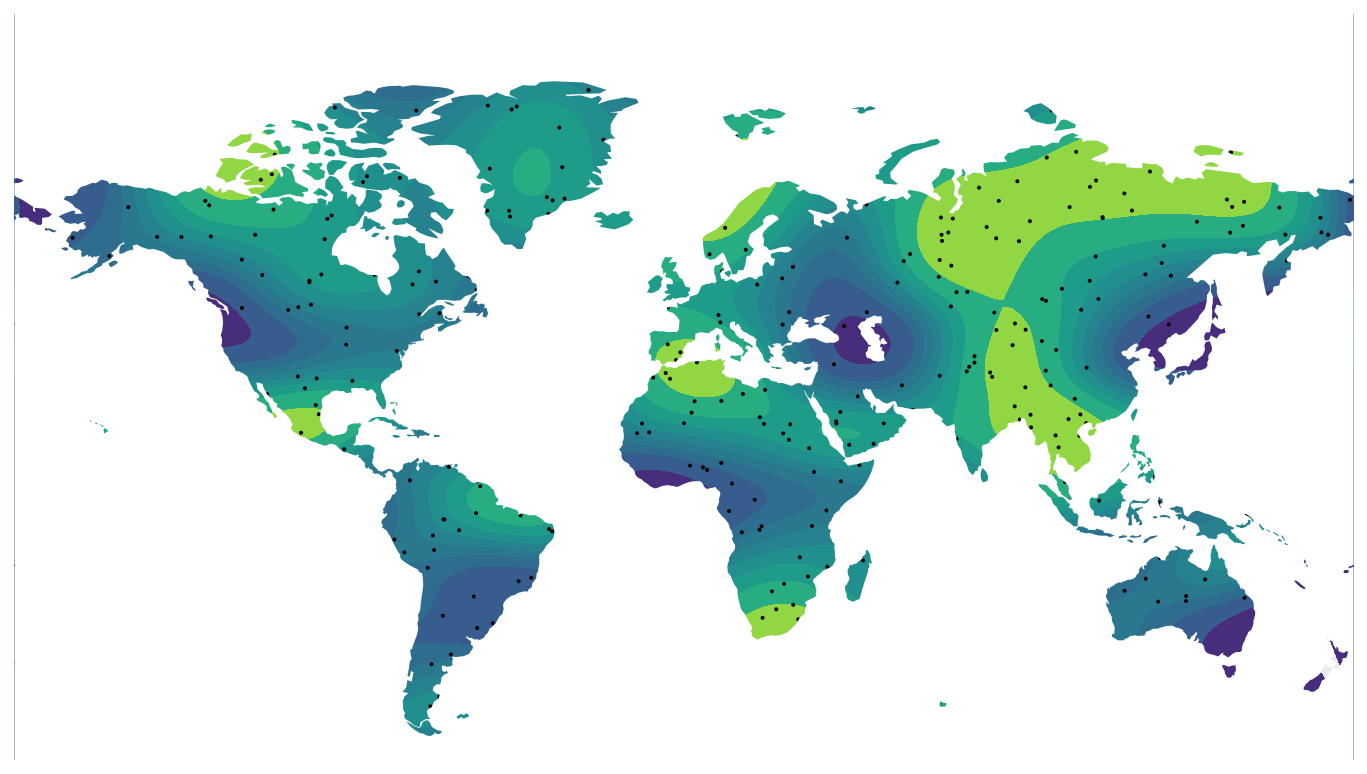

In [82]:
ax = gplt.kdeplot(
    gdf, cmap='viridis', projection=gcrs.Miller(), figsize=(12, 12),
    shade=True,
    clip=world,
    alpha=1,
    #shade_lowest=True,
    bw_adjust=0.5
)
gplt.pointplot(gdf, s=1, color='black', projection=gcrs.Miller(), extent=(-180, -60, 180, 90), ax=ax)

/Users/kmt/anaconda3/envs/cartopy_maps/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


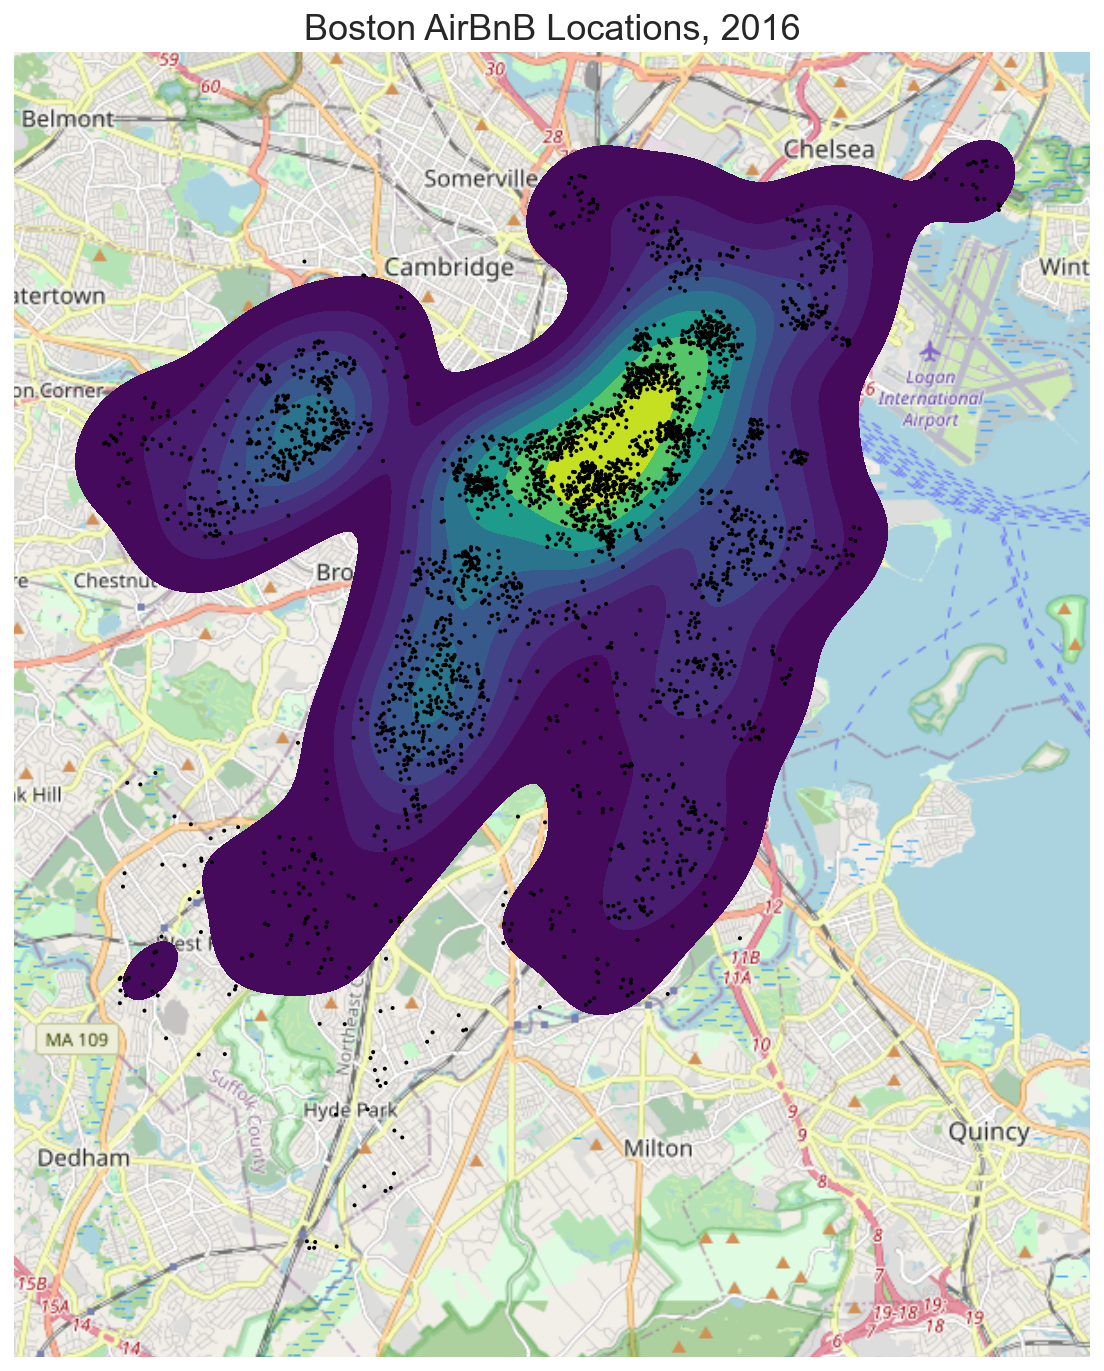

In [59]:
boston_airbnb_listings = gpd.read_file(gplt.datasets.get_path('boston_airbnb_listings'))

ax = gplt.kdeplot(
    boston_airbnb_listings, cmap='viridis', projection=gcrs.WebMercator(), figsize=(12, 12),
    shade=True
)
gplt.pointplot(boston_airbnb_listings, s=1, color='black', ax=ax)
gplt.webmap(boston_airbnb_listings, ax=ax)
plt.title('Boston AirBnB Locations, 2016', fontsize=18)

fig = plt.gcf()